In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import Stream, UTCDateTime, read

In [2]:
# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance

In [3]:
hypdist_array = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array.npy')

[  495.39974737   423.39643773   398.20169796 ...,  1373.95725762
  1980.611552    1346.61266435]


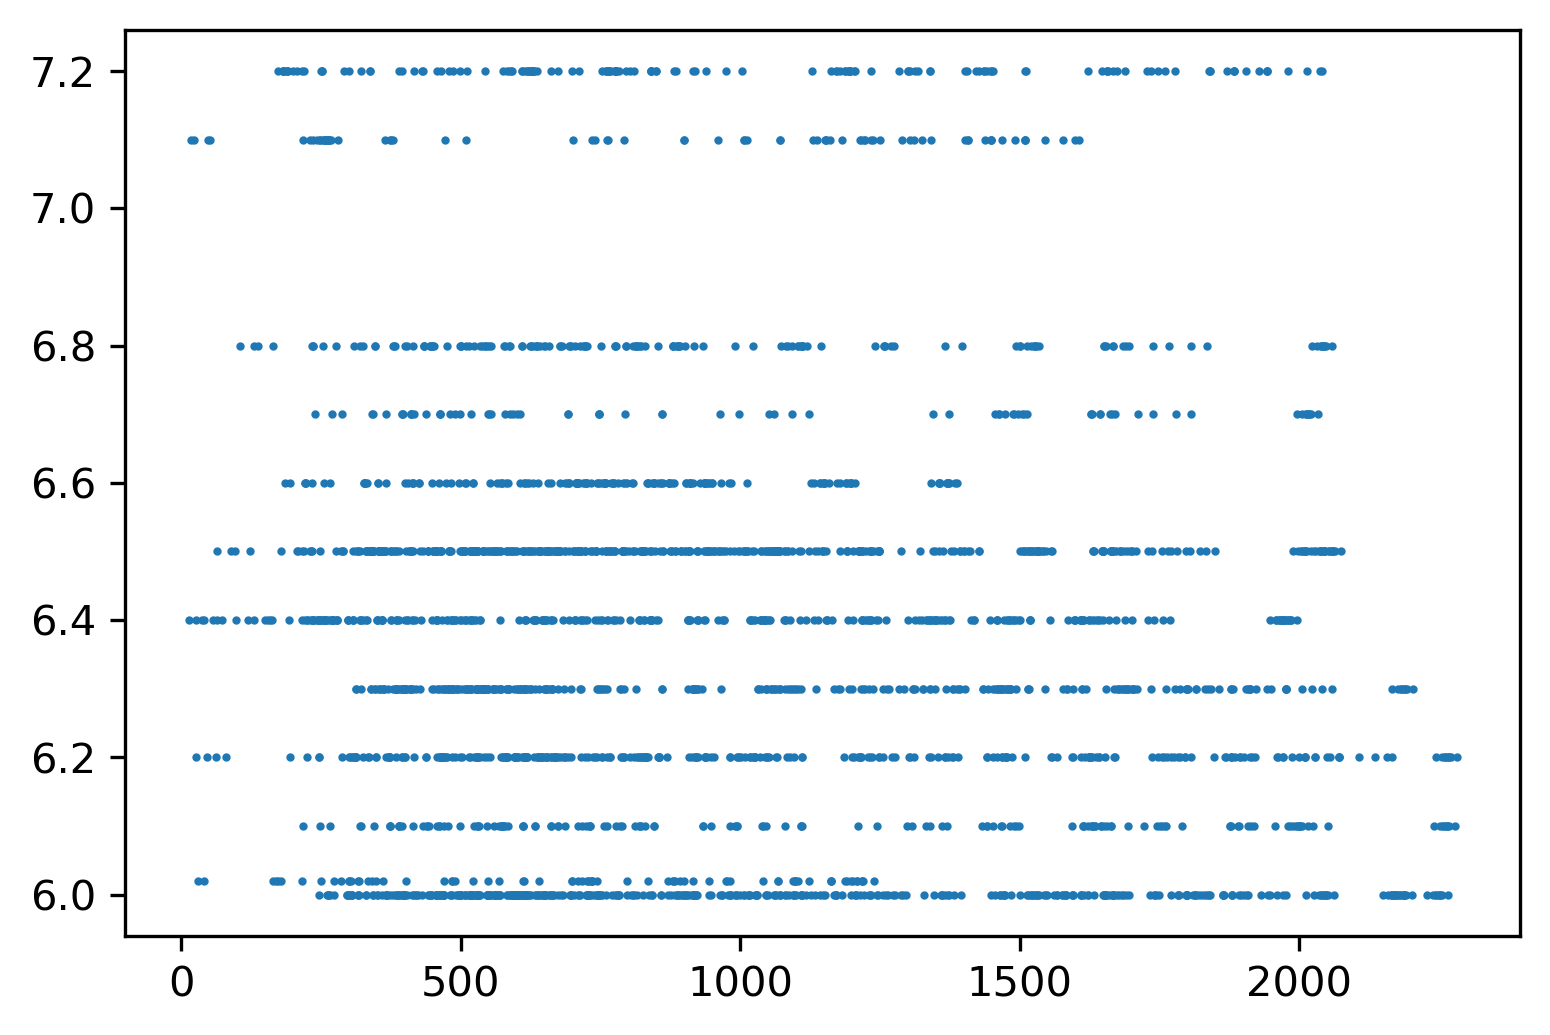

In [4]:
all_mags = hypdist_array[:,4].astype(float)
all_dists = hypdist_array[:,8].astype(float)

print(all_dists)

plt.figure(dpi = 300)
plt.scatter(all_dists, all_mags, s = 1);

In [5]:
k = np.where(hypdist_array[:,8].astype(float) <= 500)
print(len(hypdist_array[k]))

np.save('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km.npy', hypdist_array[k])


549


In [6]:
selection = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km.npy')


In [7]:
selection[0]

array(['2023-04-13_M6', '2023-04-13T15:54:53.808Z', '49.215', '-129.6178',
       '6.0', 'B001', '48.04307', '-123.13141', '495.399747368'],
      dtype='<U32')

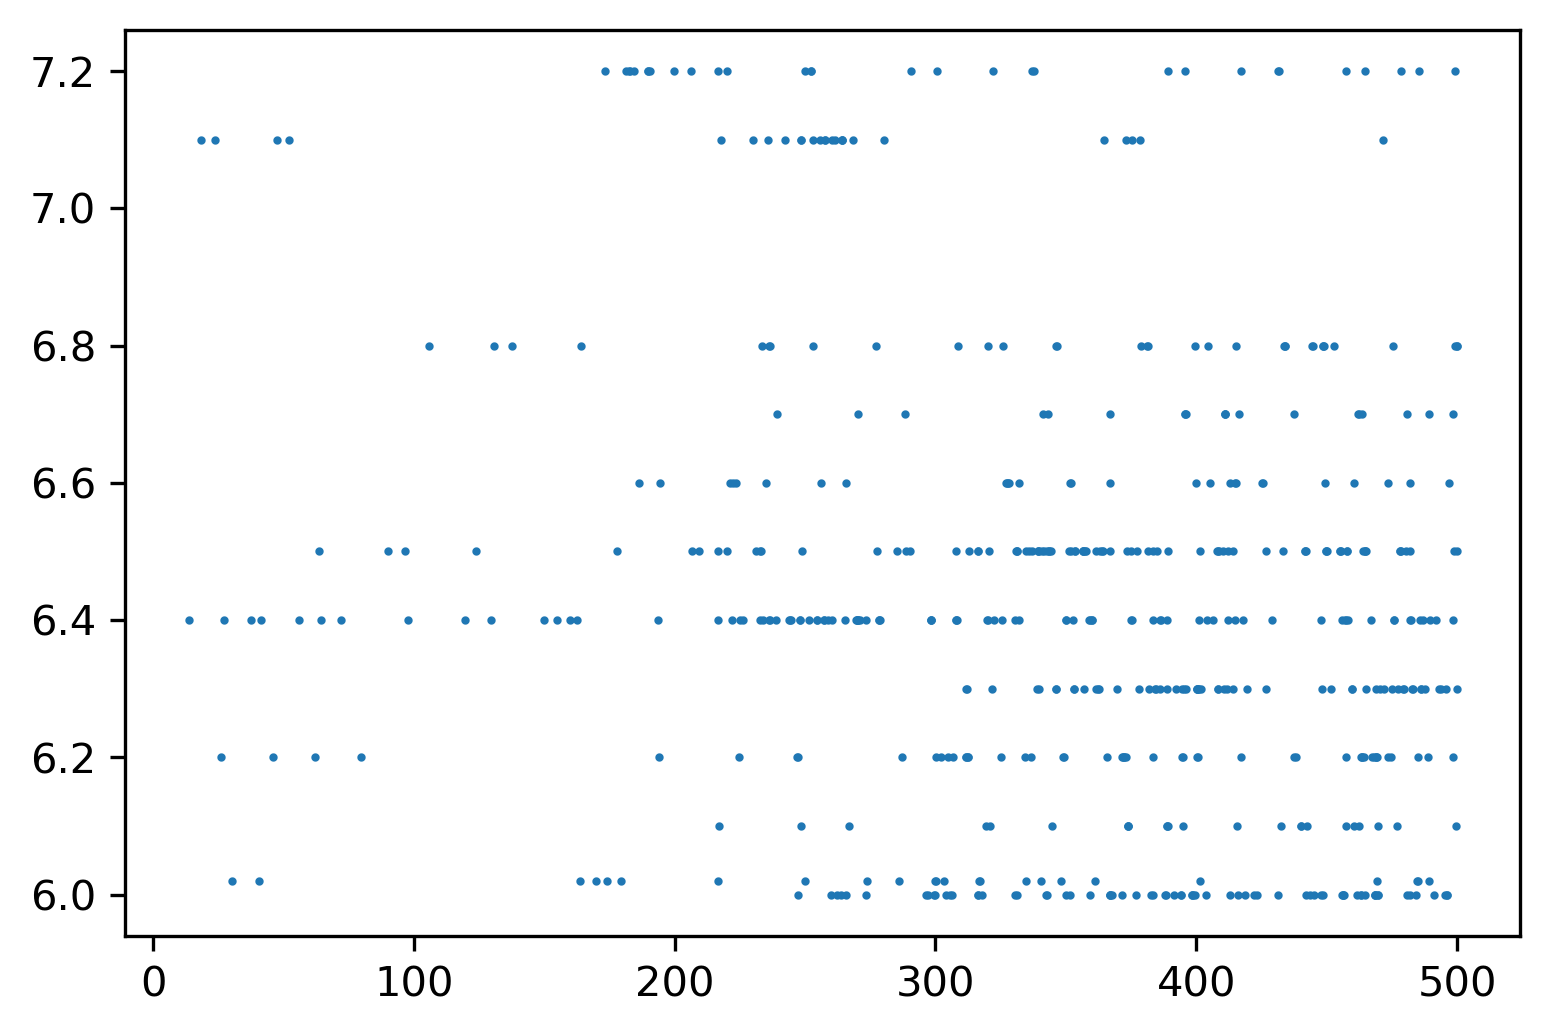

In [8]:
sel_mags = selection[:,4].astype(float)
sel_dists = selection[:,8].astype(float)

plt.figure(dpi = 300)
plt.scatter(sel_dists, sel_mags, s = 1);

In [9]:
eqs = selection[:, 0]
stas = selection[:, 5]

path_to_files = '/Users/sydneydybing/StrainProject/2024/'

missing_rows = []

for i in range(len(eqs)):
    
    eq = eqs[i]
    sta = stas[i]

    # load raw
    
    try:
    
        eq_load_dir = path_to_files + 'strain_data/raw/' + str(eq) + '/' + str(sta) + '/'

        BS1 = read(eq_load_dir + 'BS1.mseed')
        BS2 = read(eq_load_dir + 'BS2.mseed')
        BS3 = read(eq_load_dir + 'BS3.mseed')
        BS4 = read(eq_load_dir + 'BS4.mseed')
    
    except:
        
#         print('Missing one or more components - ' + str(eq) + ' station ' + str(sta))
        missing_rows.append(i)

In [10]:
selected_pairs_with_data = np.delete(selection, missing_rows, axis = 0)

print(selection.shape)
print(len(missing_rows))
print(selected_pairs_with_data.shape)

(549, 9)
110
(439, 9)


In [11]:
np.save('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata.npy', selected_pairs_with_data)


In [12]:
array = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata.npy')
array[0]

array(['2023-04-13_M6', '2023-04-13T15:54:53.808Z', '49.215', '-129.6178',
       '6.0', 'B001', '48.04307', '-123.13141', '495.399747368'],
      dtype='<U32')

In [13]:
n = np.where(array[:,0] == '2021-12-20_M6.2')[0]
print(array[n][:,5])
print(array[n][:,8])

['B027' 'B028' 'B030' 'B031' 'B032' 'B033' 'B035' 'B036' 'B039' 'B040'
 'B045' 'B054' 'B057' 'B058' 'B065' 'B066' 'B933' 'B934' 'B935']
['469.262682171' '468.836118188' '417.266898848' '371.331559743'
 '371.719909516' '336.679773291' '246.838143668' '247.128032307'
 '193.946266053' '224.635419164' '26.0916102225' '334.366355743'
 '301.985826821' '463.522887986' '473.661580418' '457.439247979'
 '46.1320567955' '79.6555825499' '62.2800726464']
